In [1]:
import cv2
import os
import pandas as pd
import random
from PIL import Image

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cam = cv2.VideoCapture(0) #Use 1 if you are using external webcam.
# cam = cv2.VideoCapture('file') # If you want to read from a source.

while True:
    ret, frame = cam.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3 ,4) #Finding faces

    
    for(x,y,w,h) in faces:
        # Starting point:x,y - Ending point: x+width,y+height - Blue rectangle with line width 2
        cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0), 2)
        
        # It is wise to search for eyes only where the face is. So we narrow our search to only face region.
        region_of_interest = gray[y:y+h, x:x+w] # Finding eyes in grayscale
        region_of_interest_color = frame[y:y+h, x:x+w] # We're gonna show the eyes in colored image.
        eyes = eye_cascade.detectMultiScale(region_of_interest)
        for(ex, ey ,ew, eh) in eyes:
            # Center of the circle is half the way through starting point to the end point.
            center = (ex + int((ew/2)), ey + int((eh/2)))
            # If the rectangle is Width rectangle, the radius will be half of the width. Vice versa
            radius = ew if ew > eh else eh
            # Comment rectangle out, if you want rectangles on eyes.
            cv2.circle(region_of_interest_color, center, int(radius/2), (36,8,8),2)
#             cv2.rectangle(region_of_interest_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
        
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # Cancels on pressing 'q' button
        break

cam.release()
cv2.destroyAllWindows() # If you dont use it, python might crash.

In [2]:
# Displaying your webcam output. Can be used to check if webcam is working.

cam = cv2.VideoCapture(0) #Use 1 if you are using external webcam.

while True:
    ret, frame = cam.read()
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): # Cancels on pressing 'q' button
        break

cam.release()
cv2.destroyAllWindows() # If you dont use it, python might crash.

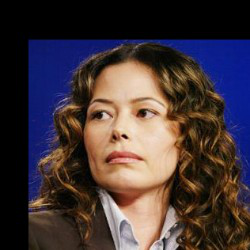

In [3]:
path = "./lfw"
data = []

for root, dirs, files in os.walk(path):
    if files[0] != '.DS_Store':
        temp = Image.open(os.path.join(root , files[0]))
        keep = temp.copy() #work around for "too man open files" 
        data.append(keep)
        temp.close()
        
display(data[random.randint(0, len(data)-1)]) #displaying on cell